<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/7%20-%20Decision%20Tree%20e%20Random%20Forest/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

### Importiamo i moduli

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

### Definiamo le costanti

In [2]:
RANDOM_SEED = 0

### Carichiamo il dataset

In [14]:
df = pd.read_csv("penguins.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['culmen_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['culmen_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['culmen_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['culmen_depth_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['flipper_length_mm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['body_mass_g'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['sex'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['culmen_length_mm', 'culmen_depth_mm'], ['culmen_depth_mm', 'flipper_length_mm'], ['flipper_length_mm', 'body_mass_g']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['culmen_length_mm', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_11, *['culmen_depth_mm', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['flipper_length_mm', 'sex'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['body_mass_g', 'sex'], **{'inner': 'stick'})
chart

In [15]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Preprocessing dei dati

In [70]:
from sklearn import set_config
set_config(transform_output="pandas")

In [71]:
df = df.dropna()

In [72]:
X = df.drop("species", axis=1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
152,Dream,46.5,17.9,192.0,3500.0,FEMALE
112,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
122,Torgersen,40.2,17.0,176.0,3450.0,FEMALE
195,Dream,45.5,17.0,196.0,3500.0,FEMALE
196,Dream,50.9,17.9,196.0,3675.0,FEMALE


In [74]:
transf = ColumnTransformer([('ohe', OneHotEncoder(sparse_output=False), [0])], remainder="passthrough")
X_train = transf.fit_transform(X_train)
X_test = transf.transform(X_test)
X_train.head()

,ohe__island_Biscoe,ohe__island_Dream,ohe__island_Torgersen,remainder__culmen_length_mm,remainder__culmen_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__sex
152,0.0,1.0,0.0,46.5,17.9,192.0,3500.0,FEMALE
112,1.0,0.0,0.0,39.7,17.7,193.0,3200.0,FEMALE
122,0.0,0.0,1.0,40.2,17.0,176.0,3450.0,FEMALE
195,0.0,1.0,0.0,45.5,17.0,196.0,3500.0,FEMALE
196,0.0,1.0,0.0,50.9,17.9,196.0,3675.0,FEMALE


In [109]:
restore_names = lambda f: f.replace("remainder__","")
X_train = X_train.rename(columns=restore_names)
X_test = X_test.rename(columns=restore_names)

X_train.head()

,ohe__island_Biscoe,ohe__island_Dream,ohe__island_Torgersen,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
152,0.0,1.0,0.0,46.5,17.9,192.0,3500.0,1
112,1.0,0.0,0.0,39.7,17.7,193.0,3200.0,1
122,0.0,0.0,1.0,40.2,17.0,176.0,3450.0,1
195,0.0,1.0,0.0,45.5,17.0,196.0,3500.0,1
196,0.0,1.0,0.0,50.9,17.9,196.0,3675.0,1


In [77]:
le = LabelEncoder()
X_train["remainder__sex"] = le.fit_transform(X_train["remainder__sex"])
X_test["remainder__sex"] = le.fit_transform(X_test["remainder__sex"])
X_train.head()

,ohe__island_Biscoe,ohe__island_Dream,ohe__island_Torgersen,remainder__culmen_length_mm,remainder__culmen_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__sex
152,0.0,1.0,0.0,46.5,17.9,192.0,3500.0,1
112,1.0,0.0,0.0,39.7,17.7,193.0,3200.0,1
122,0.0,0.0,1.0,40.2,17.0,176.0,3450.0,1
195,0.0,1.0,0.0,45.5,17.0,196.0,3500.0,1
196,0.0,1.0,0.0,50.9,17.9,196.0,3675.0,1


### Addestriamo un albero

In [111]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RANDOM_SEED)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9552238805970149

### Addestriamo una foresta

In [79]:
from sklearn.ensemble import RandomForestClassifier

for n_tree in [1, 2, 3, 5, 10, 20, 50, 100, 500, 1000]:
  print(f"Addestramento di una foresta con {n_tree} alberi...")
  forest = RandomForestClassifier(n_tree, random_state=RANDOM_SEED)
  forest.fit(X_train, y_train)
  print("Test Accuracy:",forest.score(X_test, y_test))

Addestramento di una foresta con 1 alberi...
Test Accuracy: 0.9402985074626866
Addestramento di una foresta con 2 alberi...
Test Accuracy: 0.9701492537313433
Addestramento di una foresta con 3 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 5 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 10 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 20 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 50 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 100 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 500 alberi...
Test Accuracy: 0.9850746268656716
Addestramento di una foresta con 1000 alberi...
Test Accuracy: 0.9850746268656716


In [80]:
forest = RandomForestClassifier(3, random_state=RANDOM_SEED)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=0)

### Visualizziamo la foresta

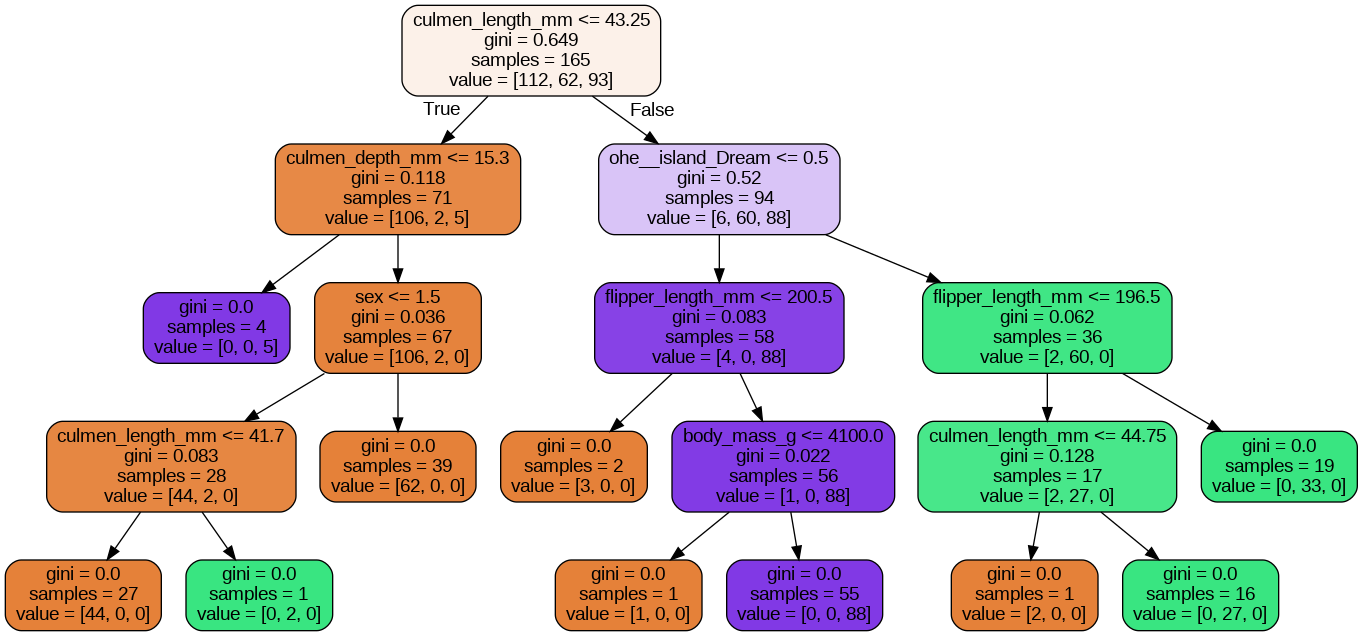

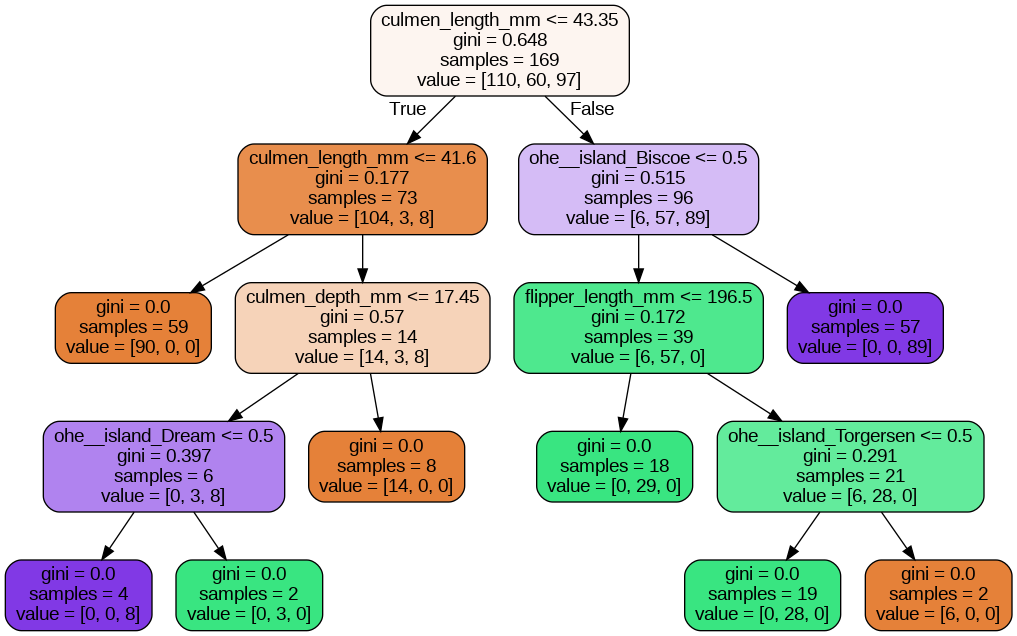

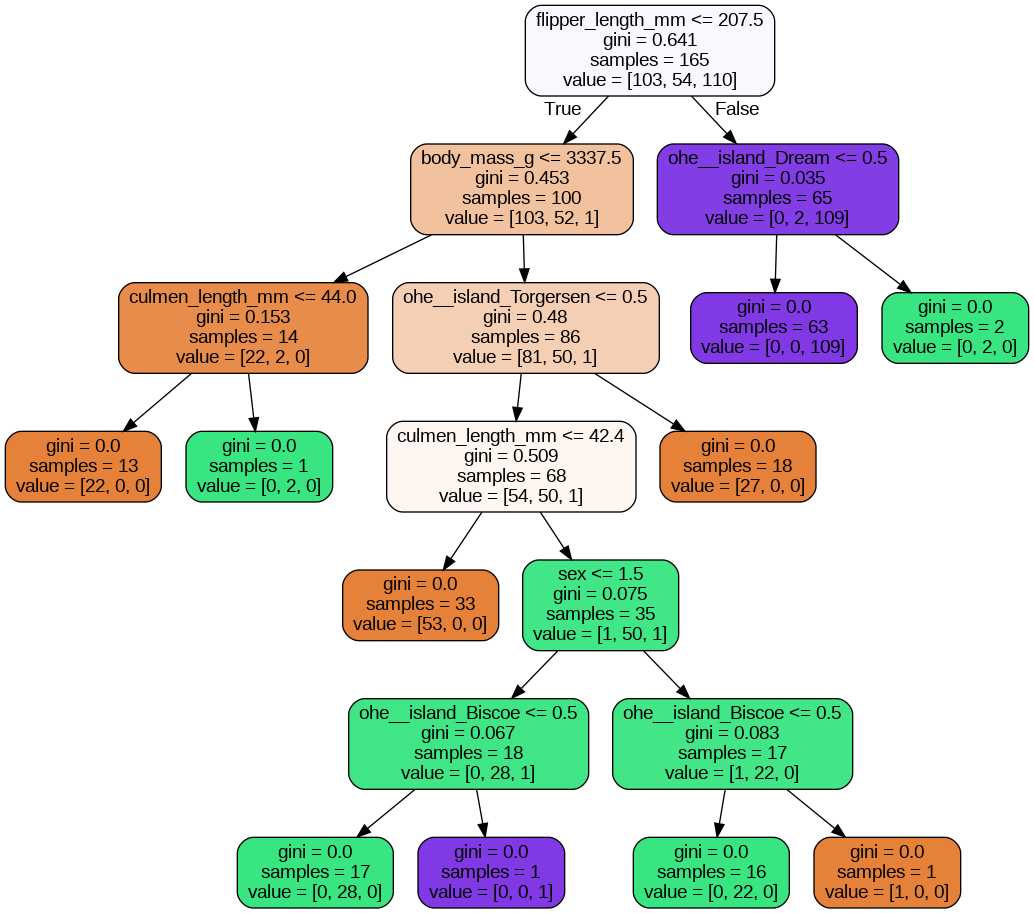

In [112]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image, display

for i,tree in enumerate(forest.estimators_):
  dot_data = export_graphviz(tree,
                  feature_names=X_train.columns.values,
                  filled=True,
                  rounded=True)
  graph = graphviz.Source(dot_data, filename="tree_"+str(i), format="png")
  graph.view()
  display(Image("tree_"+str(i)+".png"))